<a href="https://colab.research.google.com/github/jyhyun1008/SolarHalo/blob/main/SOHAPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOlar HAlo PreDictor

SOHAPD는 조선시대 기록 중 승정원일기나 소현동궁일기에 기록된 햇무리 현상들을 분석하고 예상도를 그려 주는 프로그램입니다. RNN을 사용하여 보다 정확한 판단이 가능하며, 더 나은 모델이 나올 때마다 수정하고 있습니다.

SOHAPD를 제대로 사용하기 위해서는, 햇무리 관측 데이터(문장)뿐 아니라 당시 태양의 고도가 필요합니다. 태양 고도를 계산하기 위한 알고리즘은 여기에 싣지 않았으므로, 직접 계산하셔야 합니다. 그러나 SOHAPD는 기본적으로 25도와 40도만을 기준으로 햇무리 모양을 판단하므로 대략적인 고도만 알고 계셔도 상관없습니다.

SOHAPD에 사용된 데이터의 분류 기준은 저의 기존 햇무리 연구 결과를 따르며, 고도별 햇무리 그림들은 https://www.atoptics.co.uk/ 를 참조하여 직접 그린 것입니다.

제 햇무리 연구 결과가 직접 업로드되지는 않겠지만, 딥러닝을 위한 각종 데이터가 수록된 깃헙 https://github.com/jyhyun1008/SolarHalo 도 많은 관심 부탁드립니다.

#모듈 및 모델 불러오기

In [1]:
import numpy as np

import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle
from PIL import Image

!git clone https://github.com/jyhyun1008/SolarHalo.git halo

# loading
with open('halo/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
model = load_model('halo/best_model.h5')

fatal: destination path 'halo' already exists and is not an empty directory.


In [2]:
def halo_predict(text_data, altitude):
  text_data = text_data.replace('內赤外靑', '')
  text_data = text_data.replace('色', '')
  text_data = text_data.replace('皆', '')
  text_data = text_data.replace(', ', '')
  text_data = text_data.replace('.', '')
  arr = list(text_data)
  blank = ''
  for j in range(0, len(arr)):
    blank = blank+' '+arr[j]
  encoded = tokenizer.texts_to_sequences([blank]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = 42) # 패딩

  ALT_Num = np.array([[0, 0, 0]])
  if altitude < 25:
    ALT_Num = np.array([[1, 0, 0]])
  elif altitude < 40:
    ALT_Num = np.array([[0, 1, 0]])
  else:
    ALT_Num = np.array([[0, 0, 1]])

  finalarray = tf.concat([ALT_Num, pad_new], 1)

  predictions = model.predict(finalarray) # 예측

  Trans01 = predictions[0][0]
  Trans02 = predictions[0][1]
  Trans03 = predictions[0][2]
  Trans04 = predictions[0][3]
  Trans05 = predictions[0][4]
  Trans06 = predictions[0][5]
  Trans07 = predictions[0][6]
  Trans08 = predictions[0][7]
  Trans09 = predictions[0][8]
  Trans10 = predictions[0][9]
  Trans11 = predictions[0][10]
  Trans12 = predictions[0][11]
  Trans13 = predictions[0][12]
  Trans14 = predictions[0][13]
  Trans15 = predictions[0][14]

  bgimage = Image.open('halo/bgimage.png')
  image01 = Image.open('halo/image01.png')
  image02 = Image.open('halo/image02.png')
  image03 = Image.open('halo/image03.png')
  image04 = Image.open('halo/image04.png')
  if altitude < 25:
    image05 = Image.open('halo/image05_1.png')
    image06 = Image.open('halo/image06_1.png')
  elif altitude < 40:
    image05 = Image.open('halo/image05_2.png')
    image06 = Image.open('halo/image06_2.png')
  else:
    image05 = Image.open('halo/image05_3.png')
    image06 = Image.open('halo/image06_3.png')
  image07 = Image.open('halo/image07.png')
  image08 = Image.open('halo/image08.png')
  image09 = Image.open('halo/image09.png')
  image10 = Image.open('halo/image10.png')
  image11 = Image.open('halo/image11.png')
  image12 = Image.open('halo/image12.png')
  image13 = Image.open('halo/image13.png')
  image14 = Image.open('halo/image14.png')
  image15 = Image.open('halo/image15.png')

  paste01 = list(image01.split())
  paste02 = list(image02.split())
  paste03 = list(image03.split())
  paste04 = list(image04.split())
  paste05 = list(image05.split())
  paste06 = list(image06.split())
  paste07 = list(image07.split())
  paste08 = list(image08.split())
  paste09 = list(image09.split())
  paste10 = list(image10.split())
  paste11 = list(image11.split())
  paste12 = list(image12.split())
  paste13 = list(image13.split())
  paste14 = list(image14.split())
  paste15 = list(image15.split())

  paste01[3] = paste01[3].point(lambda i: i * Trans01)
  paste02[3] = paste02[3].point(lambda i: i * Trans02)
  paste03[3] = paste03[3].point(lambda i: i * Trans03)
  paste04[3] = paste04[3].point(lambda i: i * Trans04)
  paste05[3] = paste05[3].point(lambda i: i * Trans05)
  paste06[3] = paste06[3].point(lambda i: i * Trans06)
  paste07[3] = paste07[3].point(lambda i: i * Trans07)
  paste08[3] = paste08[3].point(lambda i: i * Trans08)
  paste09[3] = paste09[3].point(lambda i: i * Trans09)
  paste10[3] = paste10[3].point(lambda i: i * Trans10)
  paste11[3] = paste11[3].point(lambda i: i * Trans11)
  paste12[3] = paste12[3].point(lambda i: i * Trans12)
  paste13[3] = paste13[3].point(lambda i: i * Trans13)
  paste14[3] = paste14[3].point(lambda i: i * Trans14)
  paste15[3] = paste15[3].point(lambda i: i * Trans15)

  image01 = Image.merge(image01.mode,paste01)
  image02 = Image.merge(image02.mode,paste02)
  image03 = Image.merge(image03.mode,paste03)
  image04 = Image.merge(image04.mode,paste04)
  image05 = Image.merge(image05.mode,paste05)
  image06 = Image.merge(image06.mode,paste06)
  image07 = Image.merge(image07.mode,paste07)
  image08 = Image.merge(image08.mode,paste08)
  image09 = Image.merge(image09.mode,paste09)
  image10 = Image.merge(image10.mode,paste10)
  image11 = Image.merge(image11.mode,paste11)
  image12 = Image.merge(image12.mode,paste12)
  image13 = Image.merge(image13.mode,paste13)
  image14 = Image.merge(image14.mode,paste14)
  image15 = Image.merge(image15.mode,paste15)

  final = Image.new("RGBA", bgimage.size)
  final = Image.alpha_composite(final, bgimage)
  final = Image.alpha_composite(final, image01)
  final = Image.alpha_composite(final, image02)
  final = Image.alpha_composite(final, image03)
  final = Image.alpha_composite(final, image04)
  final = Image.alpha_composite(final, image05)
  final = Image.alpha_composite(final, image06)
  final = Image.alpha_composite(final, image07)
  final = Image.alpha_composite(final, image08)
  final = Image.alpha_composite(final, image09)
  final = Image.alpha_composite(final, image10)
  final = Image.alpha_composite(final, image11)
  final = Image.alpha_composite(final, image12)
  final = Image.alpha_composite(final, image13)
  final = Image.alpha_composite(final, image14)
  final = Image.alpha_composite(final, image15)

  return final

#햇무리 예측

halo_predict('분석을 요청할 문장', 당시 태양의 고도)

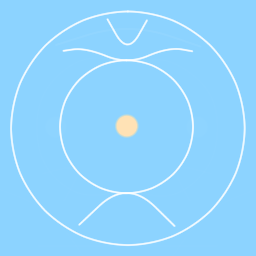

In [3]:
halo_predict('日有重暈, 內暈上有冠, 暈上有戴, 暈下有履, 色皆內亦外靑', 30)